# Data Science: explorando e analisando dados

## 01. Conhecendo os dados

In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv('data/ratings.csv')
notas.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [6]:
notas.columns

Index(['usuarioId', 'filmeId', 'nota', 'momento'], dtype='object')

In [7]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [9]:
notas['nota'].mean()

np.float64(3.501556983616962)

<Axes: ylabel='Frequency'>

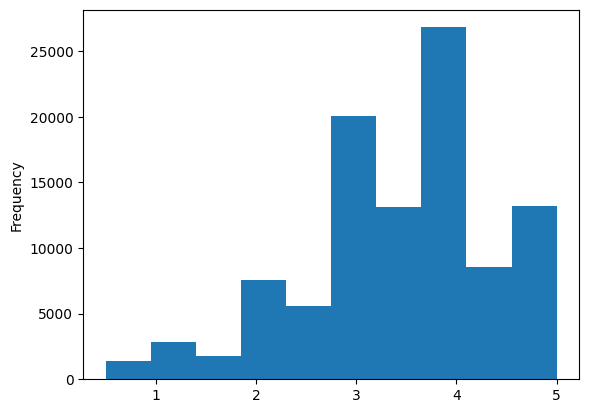

In [10]:
notas['nota'].plot(kind='hist')

In [11]:
mediana = notas['nota'].median()
media = notas['nota'].mean()

print('A mediana é:', mediana)
print('A média é:', media)

A mediana é: 3.5
A média é: 3.501556983616962


In [12]:
import seaborn as sns

<Axes: ylabel='nota'>

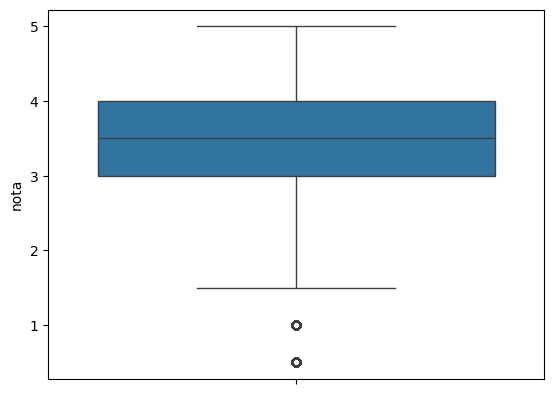

In [13]:
sns.boxplot(notas['nota'])

## 02. Analisando os dados

In [15]:
filmes = pd.read_csv('data/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

filmeId                              titulo  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                       generos  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [16]:
notas.head()

usuarioId  filmeId  nota    momento
0          1        1   4.0  964982703
1          1        3   4.0  964981247
2          1        6   4.0  964982224
3          1       47   5.0  964983815
4          1       50   5.0  964982931

In [20]:
notas.query("filmeId == 1")['nota'].mean()

np.float64(3.9209302325581397)

In [21]:
notas.query("filmeId == 2")['nota'].mean()

np.float64(3.4318181818181817)

In [27]:
medias_por_filme = notas.groupby(by='filmeId')['nota'].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

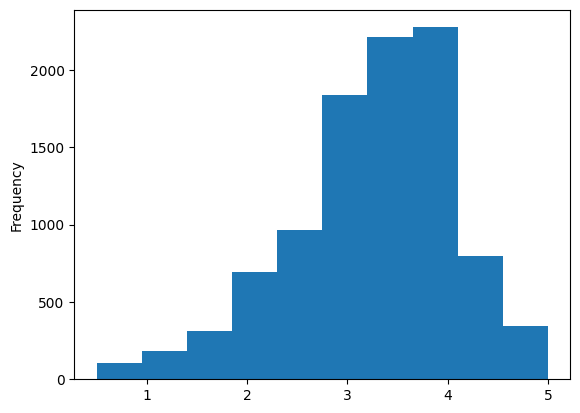

In [28]:
medias_por_filme.plot(kind='hist')

[pandas API reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

<Axes: ylabel='nota'>

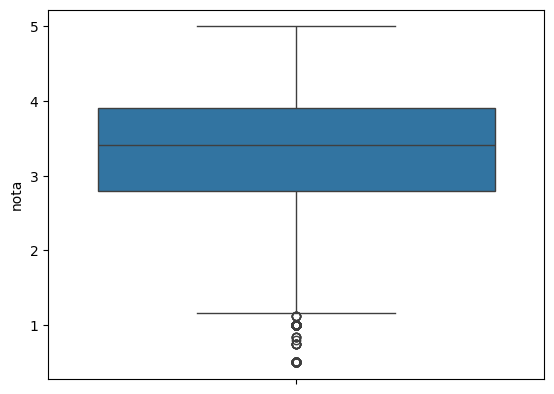

In [29]:
sns.boxplot(medias_por_filme)

In [30]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

[seaborn charts](https://seaborn.pydata.org/examples/index.html)

In [38]:
!pip install matplotlib
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das médias dos filmes')

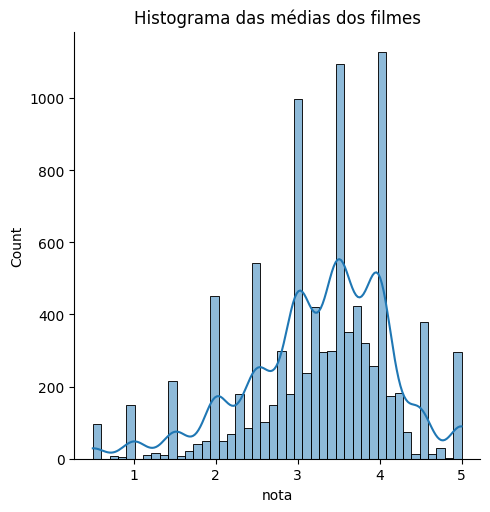

In [40]:
sns.displot(medias_por_filme, kde=True)
plt.title('Histograma das médias dos filmes')

[Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

## 03. Entendendo os tipos de variáveis

In [43]:
tmdb = pd.read_csv('data/tmdb_5000_movies.csv')
tmdb.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

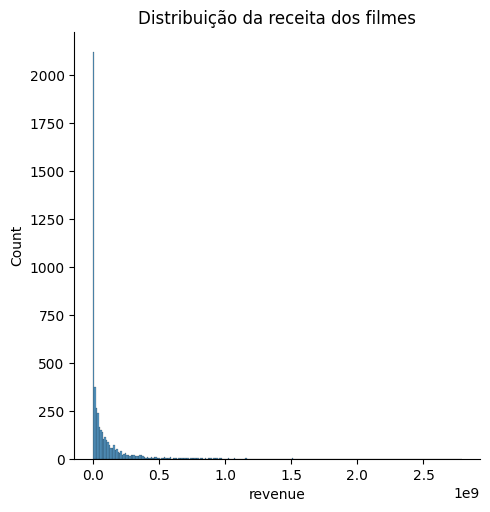

In [47]:
sns.displot(tmdb['revenue'])
plt.title(label='Distribuição da receita dos filmes')
plt.show()

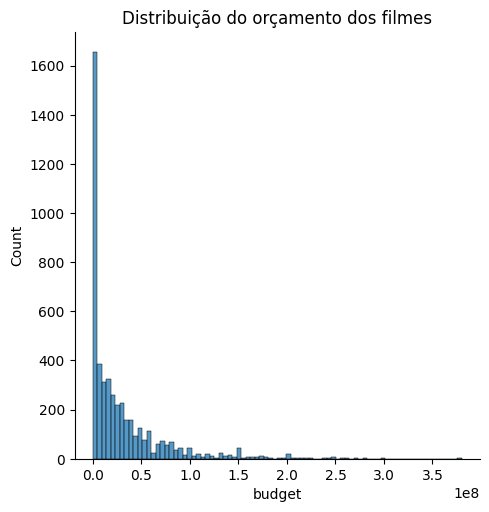

In [49]:
sns.displot(tmdb['budget'])
plt.title(label='Distribuição do orçamento dos filmes')
plt.show()

In [50]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [51]:
tmdb.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

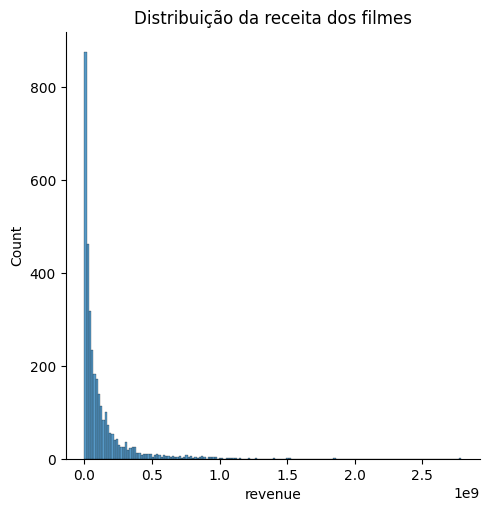

In [68]:
com_faturamento = tmdb.query('revenue > 0')
sns.displot(com_faturamento['revenue'])
plt.title(label='Distribuição da receita dos filmes')
plt.show()

In [58]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [59]:
tmdb['original_language'].mode()

0    en
Name: original_language, dtype: object

In [60]:
tmdb['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
cs       2
ta       2
ro       2
ar       2
te       1
hu       1
xx       1
af       1
is       1
tr       1
vi       1
pl       1
nb       1
ky       1
no       1
sl       1
ps       1
el       1
Name: count, dtype: int64

---

### Para saber mais: classificando as variáveis

Variáveis são caracteríticas, atributos ou quantidades de uma amostra ou população que podem ser mensuradas, contadas ou categorizadas. Elas são fundamentais para descrever e entender os fenômenos em estudo. As variáveis podem ser classificadas basicamente em dois tipos: **qualitativas** (ou categóricas) e **quantitativas** (ou numéricas).

Na imagem abaixo, podemos observar os diferentes tipos de variáveis, seja por sua natureza, quanto pelas suas derivações:

![img](https://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula03-img01.png)

#### Variáveis Qualitativas

Também conhecidas como categóricas, representam características que não podem ser medidas numericamente, mas podem ser categorizadas, ou seja, representam uma classificação. Estas variáveis podem ser **nominais** ou **ordinais**.

> Observação: a depender dos tipos dos dados, é possível que uma **variável qualitativa** possa ser representada por números. Por exemplo, uma coluna que representa uma característica em que 0 simboliza "Não" e 1 simboliza "Sim". Os números aqui servem para resumir a representação dos dados e não devem ser utilizados para cálculo, por exemplo, de média.

##### Nominal

Uma variável qualitativa nominal é aquela que classifica os elementos em classes ou categorias em relação ao tipo do dado representado. Ela não possui uma relação de grandeza ou ordem dos dados.

**Exemplos**: Nome de produtos, departamentos, métodos de pagamento ou variáveis geográficas, como, cidade, estado e região.

##### Ordinal

Uma variável qualitativa ordinal também é aquela que classifica os elementos em classes ou categorias, porém existe uma **ordem natural ou hierárquica** entre as categorias.

**Exemplos**: grau de escolaridade (ensino infantil, ensino fundamental, ensino médio), nível de satisfação do cliente (insatisfeito, neutro e satisfeito) e nível socioeconômico.

#### Variáveis Quantitativas

Representam medidas numéricas ou quantidades observáveis que podem ser expressas em números. Elas são resultantes de **contagens** (conjunto finito de valores) ou **mensurações** (conjunto infinito de valores). Estas variáveis podem ser **discretas** ou **contínuas**.

##### Discreta

Uma variável quantitativa discreta é aquela que apresenta valores que podem ser contados e geralmente inteiros.

**Exemplos**: quantidade de produto vendido, número de cômodos em uma casa e idade.

##### Contínua

Uma variável quantitativa contínua é aquela que apresenta valores que podem assumir qualquer valor dentro de um intervalo específico e geralmente são expressos como números reais.

**Exemplos**: peso de um produto, altura de uma pessoa, tempo e temperatura de um experimento.

---

Compreender as variáveis e onde elas se posicionam dentro dessas classificações facilita bastante na escolha das técnicas, visuais e análises para cada tipo de dado. Por isso, quando estiver mexendo com conjuntos de dados em seus projetos, analise o que cada coluna pode representar e como poderá te auxiliar na investigação por meio da ciência de dados.

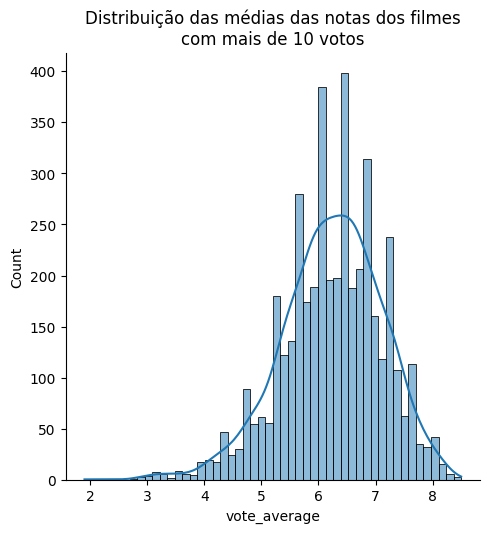

In [67]:
mais_de_10_votos = tmdb.query('vote_count > 10')
sns.displot(mais_de_10_votos['vote_average'], kde=True)
plt.title(label='Distribuição das médias das notas dos filmes\ncom mais de 10 votos')
plt.show()

## 04. Visualizando os dados

In [70]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'id', 'cs', 'ta', 'ro', 'ar', 'te',
       'hu', 'xx', 'af', 'is', 'tr', 'vi', 'pl', 'nb', 'ky', 'no', 'sl', 'ps',
       'el'],
      dtype='object', name='original_language')

In [71]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [75]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

original_language  total
0                en   4505
1                fr     70
2                es     32
3                zh     27
4                de     27

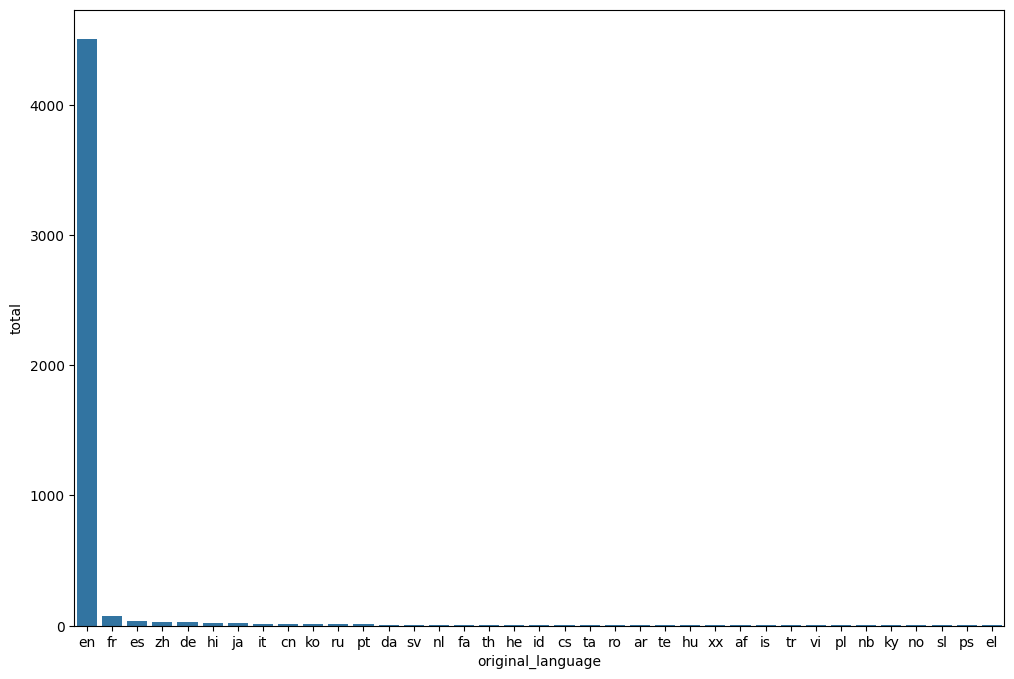

In [81]:
plt.figure(figsize=(12, 8))
sns.barplot(data=contagem_de_lingua, x='original_language', y='total')
plt.show()

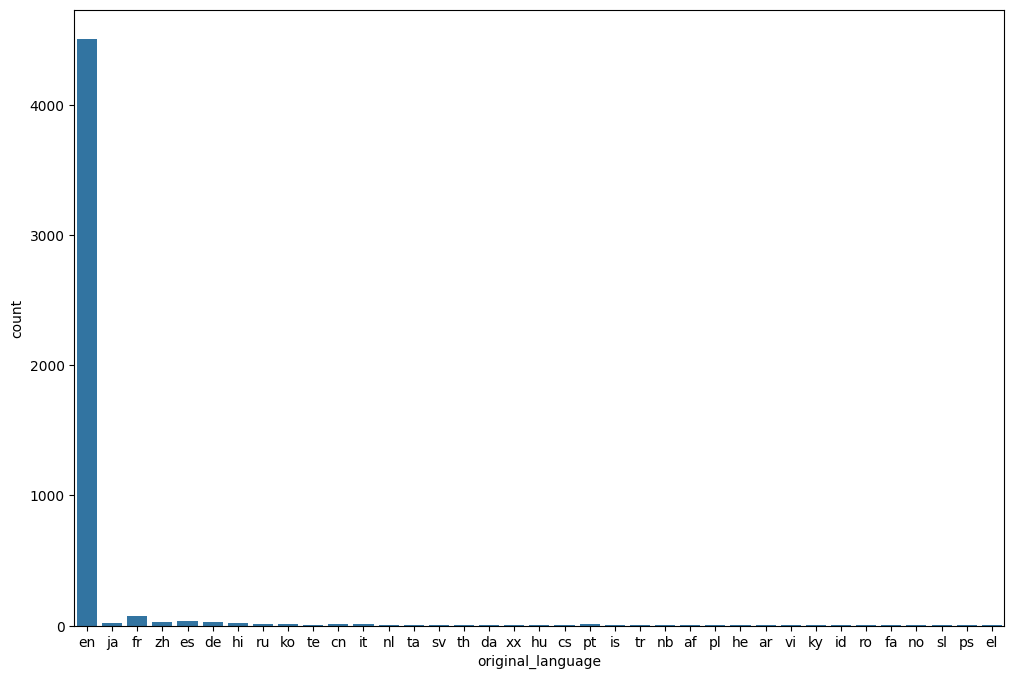

In [83]:
plt.figure(figsize=(12, 8))
sns.countplot(data=tmdb, x='original_language')
plt.show()

<Axes: ylabel='total'>

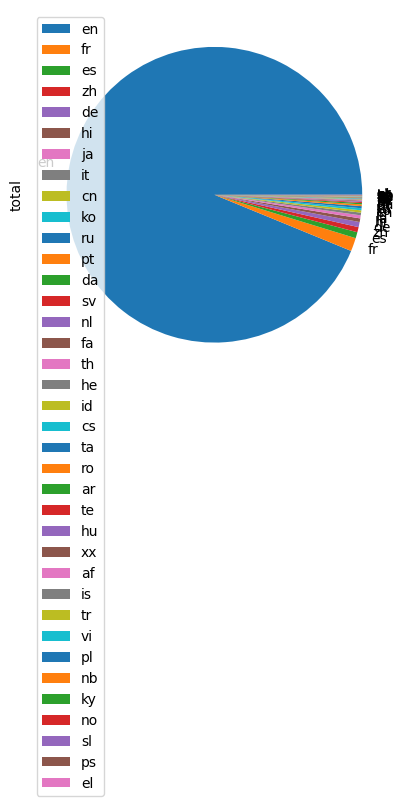

In [89]:
# show de horror que é o gráfico de pizza
contagem_de_lingua.plot(kind='pie',
                        y='total',
                        labels=contagem_de_lingua['original_language'])

In [91]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


In [95]:
dados = dict(lingua=['ingles', 'outros'],
             total=[total_de_ingles, total_do_resto])
dados = pd.DataFrame(dados)
dados

lingua  total
0  ingles   4505
1  outros    298

<Axes: xlabel='lingua', ylabel='total'>

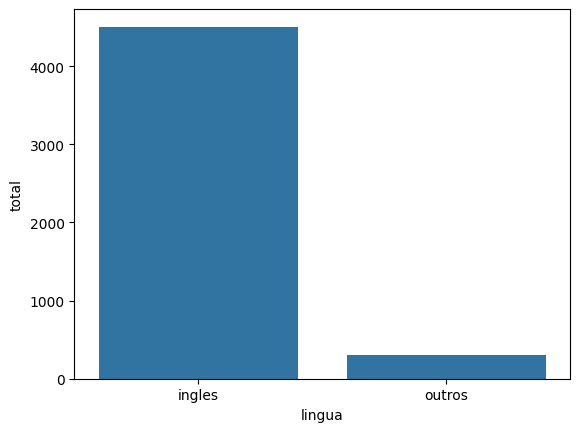

In [96]:
sns.barplot(data=dados, x='lingua', y='total')

<Axes: ylabel='total'>

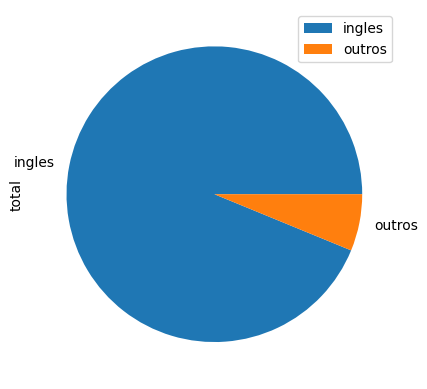

In [98]:
dados.plot(kind='pie', labels=dados['lingua'], y='total')

---

### Para saber mais: quando saber que um gráfico de pizza é eficaz?

Muitos(as) especialistas debatem sobre a praticidade dos gráficos de setores, como o gráfico de pizza e rosca, como ferramenta de visualização de dados.

Existem estudiosos(as) que se opõem a sua utilização, como [Edward Tufte](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=00018S), um renomado teórico considerado pioneiro de visualização de dados e autor de vários trabalhos sobre o assunto; e [Cole Nussbaumer Knaflic](https://www.storytellingwithdata.com/blog/2011/07/death-to-pie-charts), escritora do "Storytelling com dados", uma das obras mais destacadas na área.

Apesar disso, esses gráficos são incorporados em nosso cotidiano devido à sua capacidade direta de apresentar informações e à sua facilidade de criação em diversas ferramentas de análise de dados.

É importante destacar que muitas pessoas também apontam aplicações práticas dos gráficos de pizza e rosca para situações específicas. O artigo, [When Pie Charts Are Okay (Seriously): Guidelines for Using Pie and Donut Charts](https://depictdatastudio.com/when-pie-charts-are-okay-seriously-guidelines-for-using-pie-and-donut-charts/), escrito por Ann K. Emery, destaca alguns cenários nos quais os gráficos de pizza e rosca podem ser utilizados:

    - Dados de categorias de gêneros homem/mulher/etc;
    - Quantidade ou porcentagem de respostas de pesquisas de sim/não;
    - Estudantes que concluíram o ensino médio a tempo ou não;
    - Outros dados binários/dicotômicos.

É evidente que a adequação de um gráfico de pizza depende muito do tipo de dado ou da maneira como desejamos comunicar nossas análises ao público. Assim, apresentaremos três pontos de atenção para evitar que nossa visualização de dados cause confusão na interpretação pelo público-alvo.

#### Nunca utilize gráficos 3D e explosão de fatias

Quanto mais **simples** e **direta** for a nossa visualização, menor será o esforço cognitivo exigido de nosso público para compreender os dados apresentados.

Os gráficos de pizza já possuem certa complexidade ao relacionar partes com o todo por meio de áreas de setores circulares. A inserção de elementos 3D adiciona uma camada de complexidade ao representar dados em volumes, que não são nada triviais para nossa análise. Além disso, a explosão de fatias desloca as fatias do centro, tornando ainda mais desafiadora a comparação entre elas, como ilustrado nos gráficos a seguir.

![3D](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img01.png)

![2D](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img02.png)

#### Quanto menos fatias, melhor

Nâo há um número ideal de fatias para uma pizza. No entanto, para garantir a máxima clareza, é suficiente utilizar entre duas ou três fatias para comunicar certos pontos ao nosso público.

À medida que o número de fatias aumenta, a visualização dos dados se torna mais complexa, levantando questionamentos sobre a adequação do uso de gráficos de setores. Frequentemente, a resposta é negativa, exigindo que consideremos outras formas de visualização, como gráficos de barras, colunas, linhas ou outras representações. Os exemplos abaixo demonstram os mesmos dados dispostos de maneiras distintas.

![População brasileiraXregiões](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img03.png)

![População brasileira do NordesteXOutros](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img04.png)

> Fonte: IBGE. Diretoria de Pesquisas - DPE - Coordenação de População e Indicadores Sociais - COPIS (apenas os dados)

#### Posicionamento dos rótulos

É ideal posicionar os rótulos próximos aos dados, evitando distrações que prejudiquem a leitura e interpretação dos dados. Um exemplo disso é o posicionamento da legenda, cuja distância pode afetar diretamente a interpretação da visualização. Quanto mais distante a legenda estiver do gráfico, mais difícil será a compreensão do visual, pois exigirá uma divisão da atenção entre a legenda e o gráfico, como mostrado nos exemplos abaixo:

![Legendas distantes](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img05.png)

![Legendas próximas](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img06.png)

---

Para concluir, os gráficos de setores tendem a ser mais compreensíveis quando utilizamos frações comuns, como um quarto e três quartos (25% vs. 75%) ou um terço e dois terços (33% vs. 67%).

In [101]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")['original_language'].value_counts()
total_de_outros_filmes_por_lingua.head()

original_language
fr    70
es    32
zh    27
de    27
hi    19
Name: count, dtype: int64

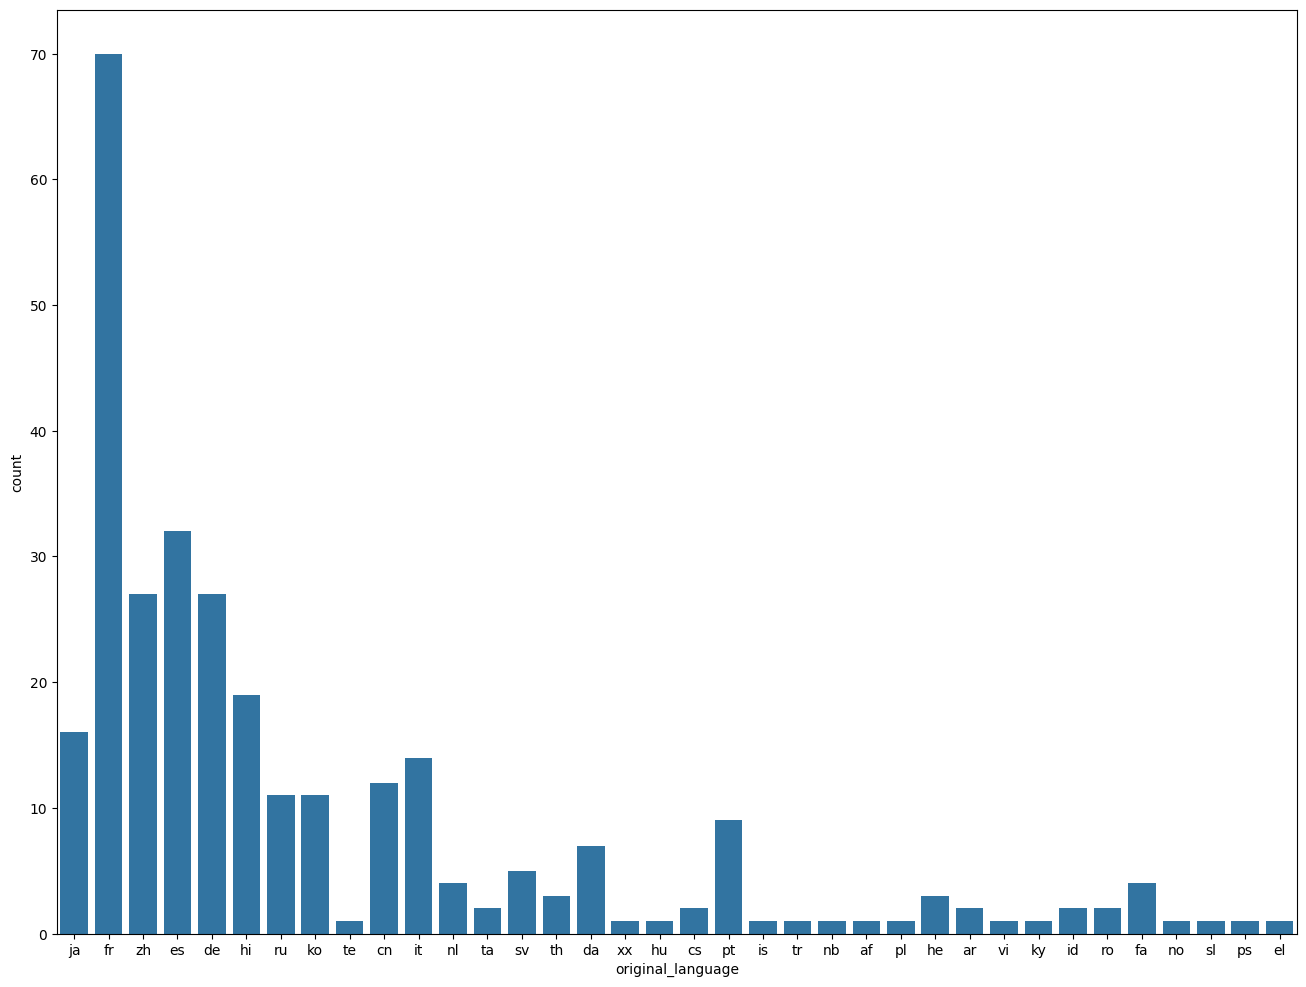

In [103]:
plt.figure(figsize=(16, 12))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              x='original_language')
plt.show()